## Feature engineering

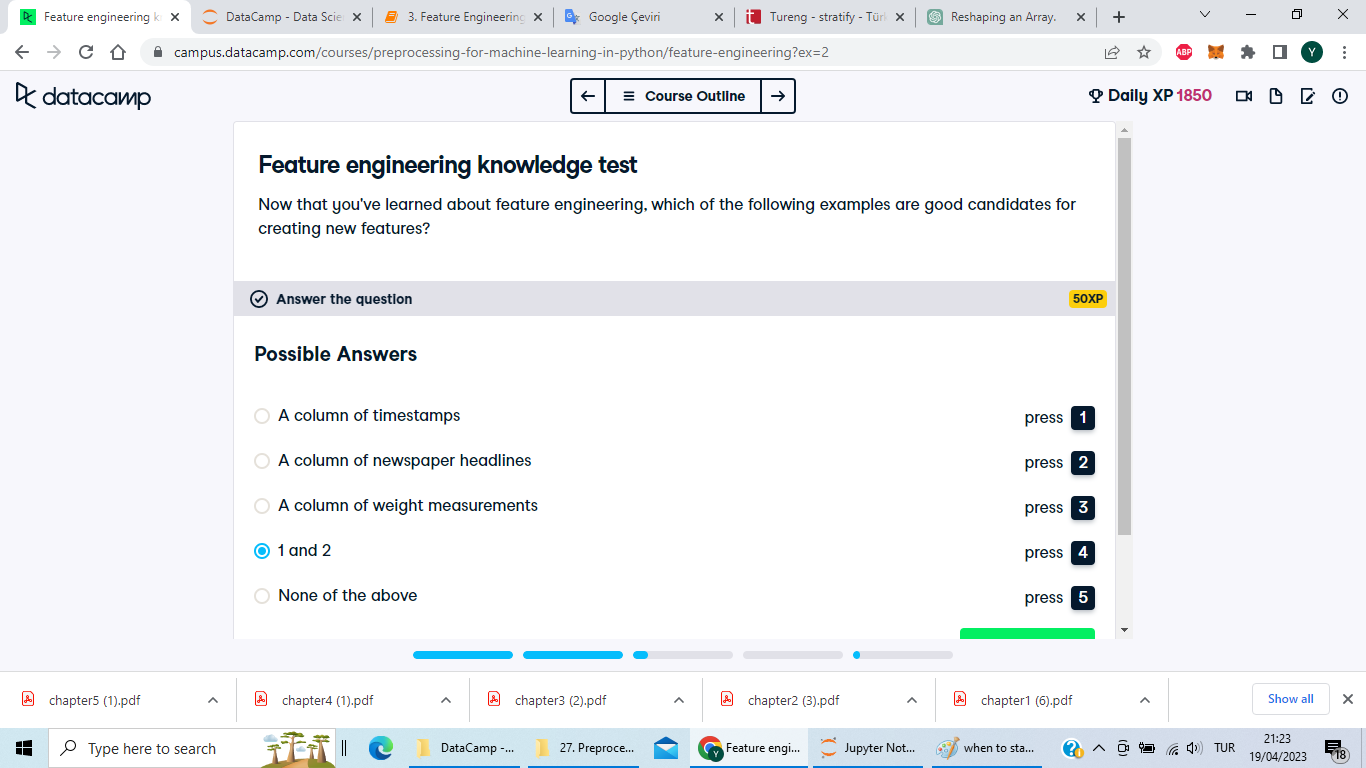

Correct! Timestamps can be broken into days or months, and headlines can be used for natural language processing.

#### Identifying areas for feature engineering
Take an exploratory look at the volunteer dataset.<br>
<br>
Which of the following columns would you want to perform a feature engineering task on?<br>
<br>
a.vol_requests<br>
b.title<br>
c.created_date<br>
d.category_desc<br>
<strong>e.2, 3, and 4</strong>

In [1]:
import pandas as pd
volunteer = pd.read_csv("volunteer_opportunities.TXT")
volunteer

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5022,37237,500,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,Strengthening Communities,...,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5055,37425,15,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,Environment,...,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,5640,50193,3,0,Volunteer for NYLAG's Food Stamps Project,197,"Volunteers needed to file for fair hearings, d...",NaN,2.0,Helping Neighbors in Need,...,November 15 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,5218,38711,10,0,Iridescent Science Studio Open House Volunteers,113,Come out to the South Bronx to help us hold ou...,NaN,1.0,Strengthening Communities,...,April 13 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,5541,47820,1,0,French Translator,145,Volunteer needed to translate written material...,NaN,2.0,Helping Neighbors in Need,...,September 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663,5398,40722,2,0,Marketing & Advertising Volunteer,330,World Cares Center is looking for individuals ...,NaN,1.0,Strengthening Communities,...,May 31 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Encoding categorical variables

#### Encoding categorical variables - binary
Take a look at the hiking dataset. There are several columns here that need encoding before they can be modeled, one of which is the Accessible column. Accessible is a binary feature, so it has two values, Y or N, which need to be encoded into 1's and 0's. Use scikit-learn's LabelEncoder method to perform this transformation.

In [2]:
hiking = pd.read_json('hiking.TXT') # even though the file extension is txt, data is json formatted. 
                                    # so we need to use read_json
hiking

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN
5,Q001,Alley Pond Trails,"Park-wide. Check out our <a href=""/park-featur...",Alley Pond Park,Various,Various,Numerous trails wind through native hardwood (...,N,N,NaN,NaN
6,Q015,Blue Trail,"Forest Park Drive East, off of Woodhaven Boule...",Forest Park,1.7 miles,,Forest Park's numerous trails wind through nat...,N,N,NaN,NaN
7,Q015,Orange Trail,Memorial Drive and Forest Park Drive East,Forest Park,2.4 miles,None,This trail will lead you through a 2.4 mile ad...,N,N,NaN,NaN
8,Q015,Yellow Trail,Metropolitan Avenue & Forest Park Drive East,Forest Park,1.0 mile,,,N,N,NaN,NaN
9,Q021,South Preserve Trail,Francis Lewis Boulevard and Union Turnpike,Cunningham Park,3.0 miles,None,Numerous unnamed trails wind through native ha...,N,N,NaN,NaN


In [3]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking['Accessible_enc'] = enc.fit_transform(hiking.Accessible)

# Compare the two columns
print(hiking[['Accessible_enc', 'Accessible']].head())

   Accessible_enc Accessible
0               1          Y
1               0          N
2               0          N
3               0          N
4               0          N


Nice work! .fit_transform() is a good way to both fit an encoding and transform the data in a single step.

#### Encoding categorical variables - one-hot
One of the columns in the volunteer dataset, category_desc, gives category descriptions for the volunteer opportunities listed. Because it is a categorical variable with more than two categories, we need to use one-hot encoding to transform this column numerically. Use pandas' pd.get_dummies() function to do so.

In [4]:
volunteer = pd.read_csv('volunteer_opportunities.TXT')
volunteer['category_desc']

0                            NaN
1      Strengthening Communities
2      Strengthening Communities
3      Strengthening Communities
4                    Environment
                 ...            
660    Helping Neighbors in Need
661    Strengthening Communities
662    Helping Neighbors in Need
663    Strengthening Communities
664    Strengthening Communities
Name: category_desc, Length: 665, dtype: object

In [5]:
volunteer['category_desc'].unique()

array([nan, 'Strengthening Communities', 'Environment',
       'Helping Neighbors in Need', 'Health', 'Education',
       'Emergency Preparedness'], dtype=object)

In [6]:
# Transform the category_desc column
category_enc = pd.get_dummies(volunteer['category_desc'])

# Take a look at the encoded columns
print(category_enc.head())

   Education  Emergency Preparedness  Environment  Health  \
0          0                       0            0       0   
1          0                       0            0       0   
2          0                       0            0       0   
3          0                       0            0       0   
4          0                       0            1       0   

   Helping Neighbors in Need  Strengthening Communities  
0                          0                          0  
1                          0                          1  
2                          0                          1  
3                          0                          1  
4                          0                          0  


Good job! get_dummies() is a simple and quick way to encode categorical variables.

## Engineering numerical features

#### Aggregating numerical features
A good use case for taking an aggregate statistic to create a new feature is when you have many features with similar, related values. Here, you have a DataFrame of running times named running_times_5k. For each name in the dataset, take the mean of their 5 run times.

In [7]:
running_times_5k = pd.DataFrame({'name':['Sue','Mark','Sean','Erin','Jenny','Russell'],
                                 'run1':[20.1, 16.5, 23.5, 21.7, 25.8, 30.9],
                                 'run2':[18.5, 17.1, 25.1, 21.1, 27.1, 29.6],
                                 'run3':[19.6, 16.9, 25.2, 20.9, 26.1, 31.4],
                                 'run4':[20.3, 17.6, 24.6, 22.1, 26.7, 30.4],
                                 'run5':[18.3, 17.3, 23.9, 22.2, 26.9, 29.9]})

In [8]:
running_times_5k

,name,run1,run2,run3,run4,run5
0,Sue,20.1,18.5,19.6,20.3,18.3
1,Mark,16.5,17.1,16.9,17.6,17.3
2,Sean,23.5,25.1,25.2,24.6,23.9
3,Erin,21.7,21.1,20.9,22.1,22.2
4,Jenny,25.8,27.1,26.1,26.7,26.9
5,Russell,30.9,29.6,31.4,30.4,29.9


In [9]:
# Use .loc to create a mean column
running_times_5k["mean"] = running_times_5k.loc[:, "run1":"run5"].mean(axis=1)

# Take a look at the results
running_times_5k

,name,run1,run2,run3,run4,run5,mean
0,Sue,20.1,18.5,19.6,20.3,18.3,19.36
1,Mark,16.5,17.1,16.9,17.6,17.3,17.08
2,Sean,23.5,25.1,25.2,24.6,23.9,24.46
3,Erin,21.7,21.1,20.9,22.1,22.2,21.60
4,Jenny,25.8,27.1,26.1,26.7,26.9,26.52
5,Russell,30.9,29.6,31.4,30.4,29.9,30.44


Nice work! .loc[] is especially helpful for operating across columns.

#### Extracting datetime components
There are several columns in the volunteer dataset comprised of datetimes. Let's take a look at the start_date_date column and extract just the month to use as a feature for modeling.

In [10]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer.start_date_date)

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].dt.month

# Take a look at the converted and new month columns
print(volunteer[["start_date_converted", "start_date_month"]].head())

  start_date_converted  start_date_month
0           2011-07-30                 7
1           2011-02-01                 2
2           2011-01-29                 1
3           2011-02-14                 2
4           2011-02-05                 2


Awesome! You can also use attributes like .day to get the day and .year to get the year from datetime columns.

## Engineering text features

#### Extracting string patterns
The Length column in the hiking dataset is a column of strings, but contained in the column is the mileage for the hike. We're going to extract this mileage using regular expressions, and then use a lambda in pandas to apply the extraction to the DataFrame.

In [11]:
hiking.Length.isna().sum()

4

In [12]:
import re 
hiking["Length"] = hiking["Length"].astype(str) # We wrote that code for 'TypeError: expected string or bytes-like object 
                                                  # hiking["Length_num"] = hiking["Length"].apply(return_mileage)'
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    
    # Search the text for matche
    mile = re.search("\d+\.\d+", length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking["Length"].apply(return_mileage)
print(hiking[["Length", "Length_num"]].head())

       Length  Length_num
0   0.8 miles        0.80
1    1.0 mile        1.00
2  0.75 miles        0.75
3   0.5 miles        0.50
4   0.5 miles        0.50


Great job! Regular expressions are a useful way to perform text extraction.

#### Vectorizing text
You'll now transform the volunteer dataset's title column into a text vector, which you'll use in a prediction task in the next exercise.

In [13]:
volunteer['title']

0      Volunteers Needed For Rise Up & Stay Put! Home...
1                                           Web designer
2          Urban Adventures - Ice Skating at Lasker Rink
3      Fight global hunger and support women farmers ...
4                                          Stop 'N' Swap
                             ...                        
660            Volunteer for NYLAG's Food Stamps Project
661      Iridescent Science Studio Open House Volunteers
662                                    French Translator
663                    Marketing & Advertising Volunteer
664    Volunteer filmmakers to help Mayor's Office wi...
Name: title, Length: 665, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Take the title text
title_text = volunteer.title

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

text_tfidf

<665x1140 sparse matrix of type '<class 'numpy.float64'>'
	with 3397 stored elements in Compressed Sparse Row format>

Nice job. scikit-learn provides several methods for text vectorization.

#### Text classification using tf/idf vectors
Now that you've encoded the volunteer dataset's title column into tf/idf vectors, you'll use those vectors to predict the category_desc column.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split the dataset according to the class distribution of category_desc
y = volunteer["category_desc"]
y.fillna(method = 'bfill', inplace=True) # we did it because y had NaN values and caused an error
print(y.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y, random_state=42)

nb = GaussianNB()
# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))


0
0.4431137724550898


Nice work! Notice that the model doesn't score very well. We'll work on selecting the best features for modeling in the next chapter.